# Illusion Diffusion Patern

In [6]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
    print ("CUDA & MPS devices not found.")

print("Testing torch device")
torch.ones(2, device=device) 

Testing torch device


tensor([1., 1.], device='mps:0')

## Setting up pipeline and loading of model

In [7]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to(device)
pipeline.load_lora_weights("Norod78/SD15-IllusionDiffusionPattern-LoRA")

generator = torch.Generator(device=device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


### Asking prompt

In [9]:
prompt = "A spiral wormhole IllusionDiffusionPattern"

output = pipeline(
    prompt=prompt,
    negative_prompt="low quality",
    lora_weight_scale=0.5,
    num_inference_steps=20
)
output

  0%|          | 0/50 [00:00<?, ?it/s]

StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x30B81EEE0>], nsfw_content_detected=[False])

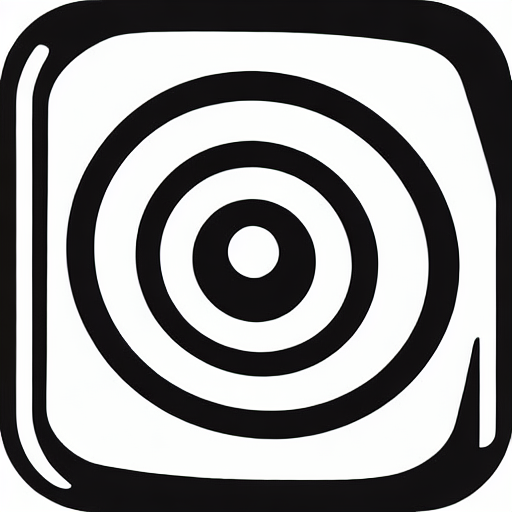

In [10]:
from datetime import datetime

now = datetime.now()

current = now.strftime("%H-%M-%S")

image = output.images[0]
image.save(f"input/patterns/pattern_{current}.png")
image